# IRIS Dataset 활용 분류(Multinomial)
---

In [30]:
# 모듈 로딩
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.special import softmax, expit
import numpy as np
import pandas as pd

# [1] 데이터 로딩 및 확인

In [31]:
data, target = load_iris(as_frame=True, return_X_y=True)
print(data.head(5), '=' * 60, sep='\n')
print(target.head(5), target.unique(), target.value_counts(), sep='\n\n')

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

[0 1 2]

0    50
1    50
2    50
Name: target, dtype: int64


# [2] 학습 / 테스트 데이터 준비

In [32]:
# 데이터 => petal_length, petal_width
# 타겟 => 0, 1, 2
# data = data.iloc[:, 2:]
# data = pd.concat([data[0:50], data[100:150]])
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [33]:
print(target.value_counts())

0    50
1    50
2    50
Name: target, dtype: int64


In [34]:
# arrX = np.array(data['petal length (cm)'].tolist()).reshape(-1, 1)
# arrY = np.array(target.tolist()).reshape(-1, 1)

# 학습용 테스트용 데이터 분리
train_input, test_input, train_target, test_target = train_test_split(
    data, target, random_state=42, test_size=0.4)
# train_input = train_input.reshape(-1, 1)
# test_input = test_input.reshape(-1, 1)

# [3] 모델 생성 및 학습

In [35]:
# 모델 생성
model = LogisticRegression(multi_class='auto')
model.fit(train_input, train_target)

LogisticRegression()

In [36]:
# parameter 확인
print(model.coef_, model.intercept_)

[[-0.39223328  0.78840332 -2.17464031 -0.93805736]
 [ 0.48177742 -0.35508156 -0.14020278 -0.74842331]
 [-0.08954415 -0.43332176  2.31484309  1.68648067]] [  8.61498005   1.81078772 -10.42576776]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


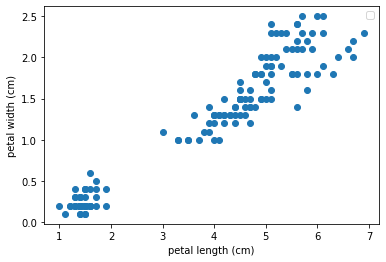

In [37]:
# 실제 데이터 산점도로 확인
plt.scatter(data['petal length (cm)'], data['petal width (cm)'])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()

# [4] 평가

In [38]:
# model.score(train_input, train_target)
# model.score(test_input, test_target)

# [5] 테스트

In [55]:
# 생성된 모델 기반으로 예측하고 확률보기
preY = model.predict([[6, 2, 3, 5]])
print('예측결과 : ', preY)

probaY = model.predict_proba([[6, 2, 3, 5]])
print("분류 종류 : ", model.classes_)
print("예측확률 : ", np.round(probaY,4))

예측결과 :  [2]
분류 종류 :  [0 1 2]
예측확률 :  [[0.001  0.0237 0.9754]]


C:\ProgramData\Anaconda3\envs\EV_PY37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
C:\ProgramData\Anaconda3\envs\EV_PY37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
